### December 2022: CT - 3 Final Project 


### Deep Learning


#### Section A: Question No:1   (15 marks)
Build a Convolution Neural Network to classify 6 different species of Butterfly images.

<u>**Dataset_Folder Name**</u>:  Butterflies_classification_dataset

<u> **Conditions to consider** </u>

- Parameters should not cross 300000

- Should not use more than 4 layers (except input and output, including convolution and dense layers)

- Use Adam Optimizer

In [1]:
import numpy as np
import pandas as pd
import os
import imageio
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.ndimage as ndi
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, GlobalAveragePooling2D, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"
from PIL import ImageFilter, Image, ImageOps
from sklearn.metrics import confusion_matrix, classification_report
from keras.callbacks import ReduceLROnPlateau

In [2]:
train_dir="Butterflies_classification_dataset/train"
test_dir="Butterflies_classification_dataset/test"

In [3]:
dir_train = 'train'
dir_folders = os.listdir(dir_train)
dir_paths_Train = [os.path.join(dir_train, path) for path in dir_folders]
dir_paths_Train

['train\\copper tail',
 'train\\gold banded',
 'train\\indra swallow',
 'train\\metalmark',
 'train\\sootywing',
 'train\\zebra long wing']

In [4]:
dir_test = 'test'
dir_folders = os.listdir(dir_test)
dir_paths_Test = [os.path.join(dir_test, path) for path in dir_folders]
dir_paths_Test

['test\\copper tail',
 'test\\gold banded',
 'test\\indra swallow',
 'test\\metalmark',
 'test\\sootywing',
 'test\\zebra long wing']

In [5]:
def plot_imgs(item_dir, title="butterfly", num_imgs=4, cmap='viridis'):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]

    plt.figure(figsize=(15, 15))
    for idx, img_path in enumerate(item_files):
        plt.subplot(8, 8, idx+1)
        img = plt.imread(img_path, 0)
        plt.title(title)
        plt.imshow(img, cmap=cmap)

    plt.tight_layout()

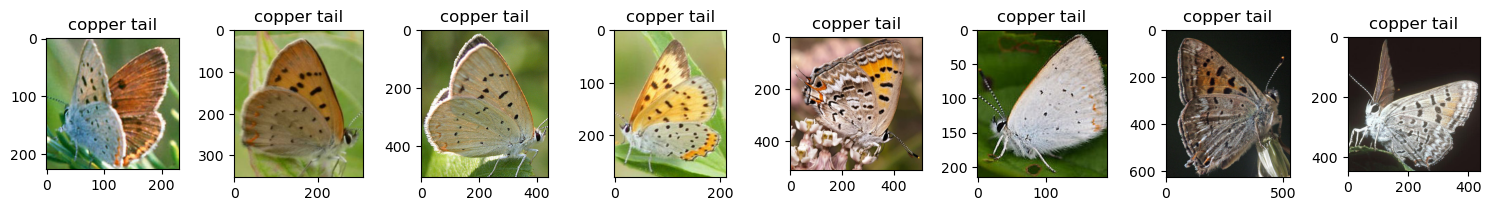

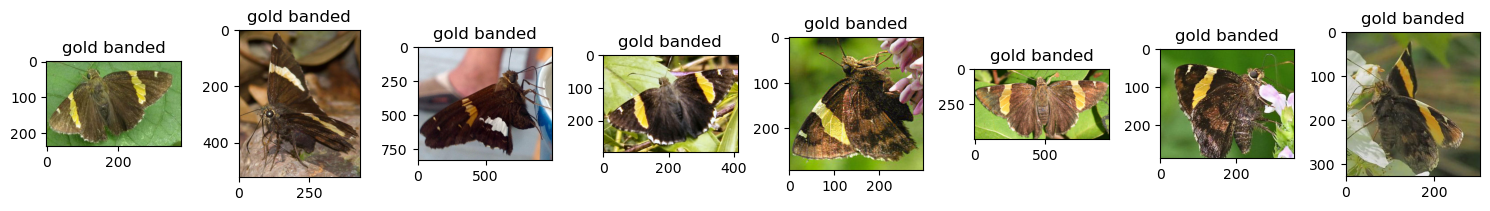

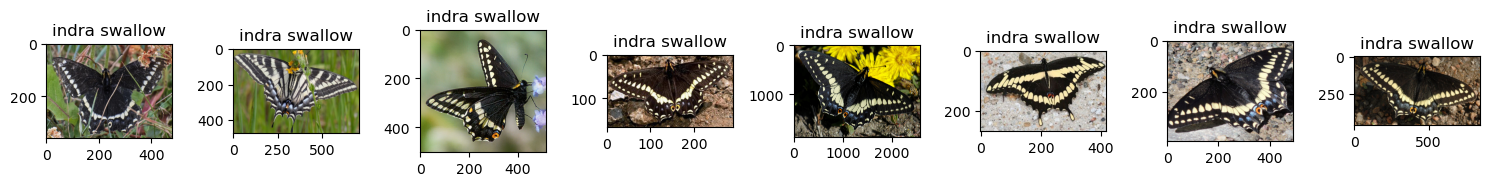

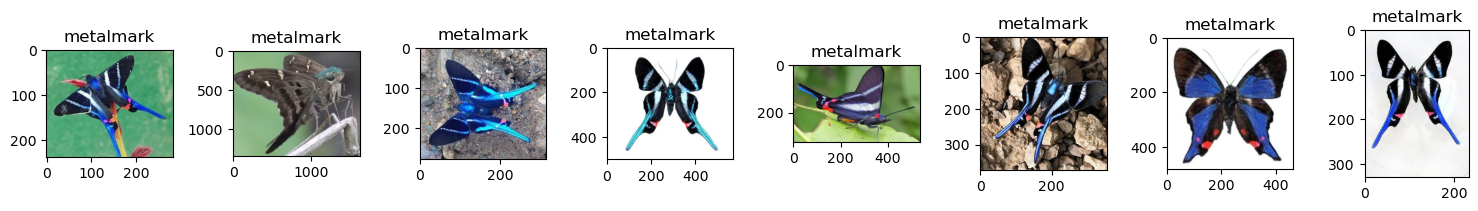

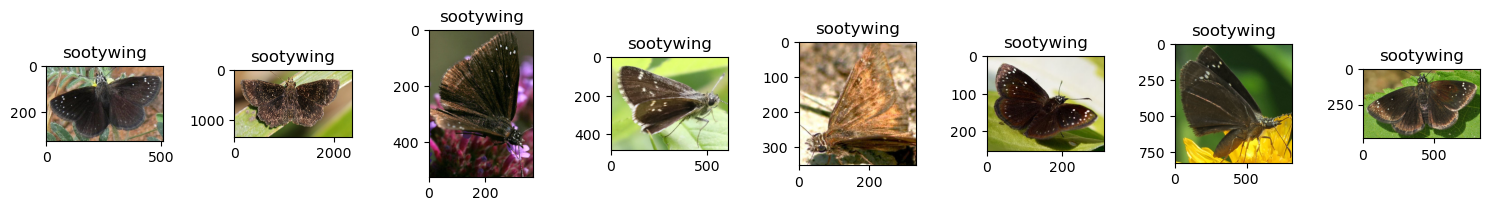

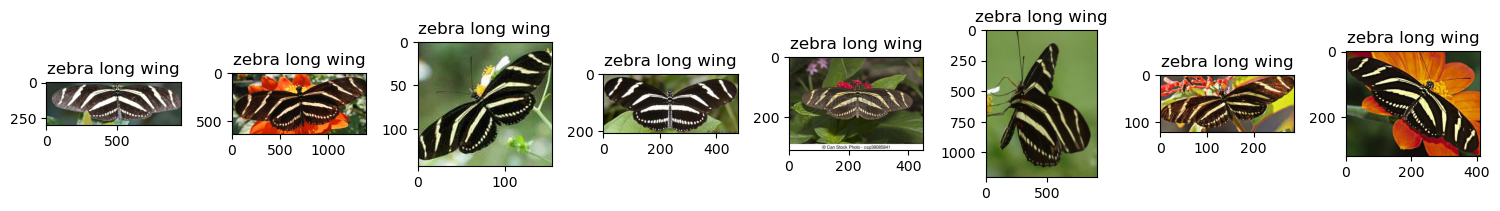

In [6]:
for path in dir_paths_Train:
    head, tail = os.path.split(path)
    plot_imgs(path, tail, 8)

In [7]:
butterfly_dic = {}
for path in dir_paths_Test:
    head, tail = os.path.split(path)
    butterfly_dic[tail] = len(os.listdir(path))

In [8]:
label_list = ["{}: {}".format(key, butterfly_dic[key]) for key in butterfly_dic]

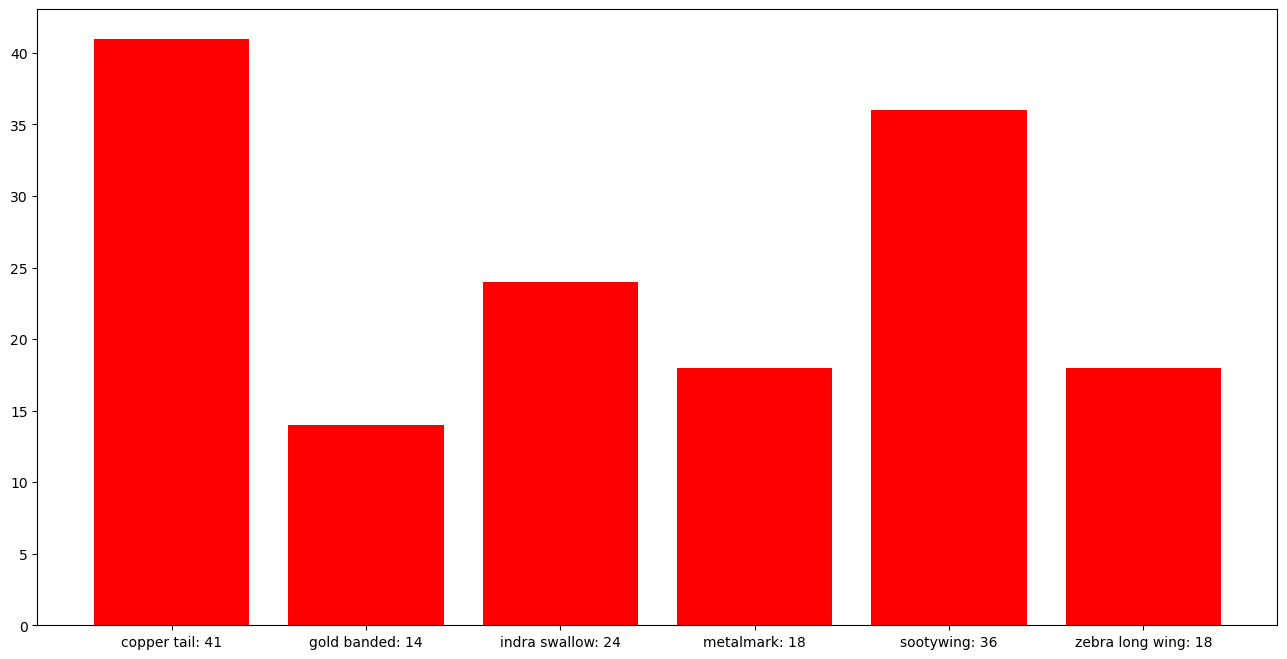

In [9]:
plt.figure(figsize=(16, 8))
plt.bar(range(len(butterfly_dic)), list(butterfly_dic.values()), color="red")
plt.xticks(range(len(butterfly_dic)), list(label_list))
plt.show();

In [10]:
img_size_h = 100
img_size_w = 100
input_shape = (img_size_h, img_size_w, 1)
batch_size = 16

In [11]:
model = Sequential([

    Conv2D(16, (5,5), input_shape=input_shape, activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(32, (5,5), padding='same', activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(6, activation='softmax'),    
])

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 6)                 1

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3,
    rotation_range=30,
    width_shift_range=0.6,
    height_shift_range=0.6,
    shear_range=3, 
    zoom_range=50,
    horizontal_flip=True,
    vertical_flip=True)

In [15]:
train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(img_size_h, img_size_w),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True, 
    seed=8)

Found 336 images belonging to 6 classes.


In [17]:
validation_generator = train_datagen.flow_from_directory(
    'test',
    target_size=(img_size_h, img_size_w),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=7)

Found 43 images belonging to 6 classes.


In [18]:
history = model.fit_generator(
    train_generator,
    epochs=20,
    validation_data=(validation_generator),
    )

C:\Users\epalanisamy.YODLEE\AppData\Local\Temp\ipykernel_1268\1482810663.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
21/21 [==============================] - 7s 277ms/step - loss: 1.8230 - accuracy: 0.1458 - val_loss: 1.7901 - val_accuracy: 0.1860
Epoch 2/20
21/21 [==============================] - 5s 234ms/step - loss: 1.7909 - accuracy: 0.1667 - val_loss: 1.7930 - val_accuracy: 0.1628
Epoch 3/20
21/21 [==============================] - 5s 253ms/step - loss: 1.7876 - accuracy: 0.1577 - val_loss: 1.7930 - val_accuracy: 0.1163
Epoch 4/20
21/21 [==============================] - 5s 252ms/step - loss: 1.7886 - accuracy: 0.1756 - val_loss: 1.7911 - val_accuracy: 0.1395
Epoch 5/20
21/21 [==============================] - 5s 239ms/step - loss: 1.7852 - accuracy: 0.1875 - val_loss: 1.7865 - val_accuracy: 0.2093
Epoch 6/20
21/21 [==============================] - 6s 275ms/step - loss: 1.7783 - accuracy: 0.1964 - val_loss: 1.7691 - val_accuracy: 0.1628
Epoch 7/20
21/21 [==============================] - 6s 307ms/step - loss: 1.7615 - accuracy: 0.2232 - val_loss: 1.7301 - val_accuracy: 0.2093
Epoch 

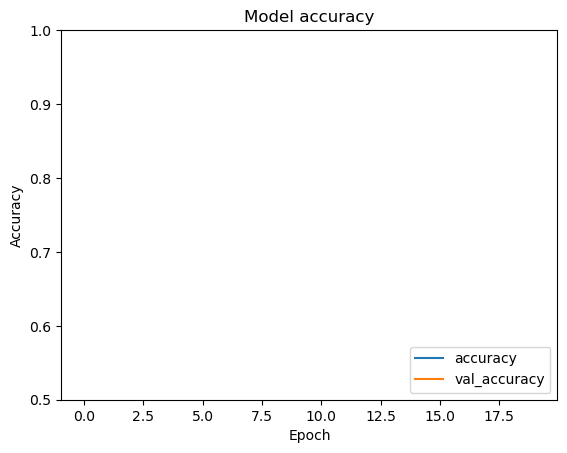

3/3 - 1s - loss: 1.7162 - accuracy: 0.2326 - 608ms/epoch - 203ms/step


In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()


test_loss, test_acc = model.evaluate(validation_generator, verbose=2)

In [20]:
print(test_acc)

0.23255814611911774


#### Section A: Question No:2   (15 marks)
Improve the baseline model performance and save the weights of improved model

<u> **Conditions to consider** </u>

 - Apply Data Augmentation if required

 - No parameter limit

 - Can use any number of layers

 - Use any optimizers of your choice 

 - Save the best model and apply early callback


In [21]:
model_new = Sequential([

      Conv2D(16, (5,5), input_shape=input_shape, activation='relu'),
      MaxPool2D((2, 2)),
      Conv2D(32, (5,5), padding='same', activation='relu'),
      MaxPool2D((2,2)),
      Conv2D(64, (5,5), padding='same', activation='relu'),
      MaxPool2D((2,2)),
      Dropout(0.5),
      Flatten(),
      Dense(128, activation='relu'),
      Dropout(0.5),
      Dense(6, activation='softmax'),    
])

In [22]:
model_new.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])
model_new.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 96, 96, 16)        416       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 48, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 48, 48, 32)        12832     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        51264     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 64)      

In [23]:
# Defining callbacks

filepath = './final_model_weights.hdf5'

earlystopping = EarlyStopping(monitor = 'val_auc', 
                              mode = 'max' , 
                              patience = 5,
                              verbose = 1)

checkpoint = ModelCheckpoint(filepath, 
                                monitor = 'val_auc', 
                                mode='max', 
                                save_best_only=True, 
                                verbose = 1)


callback_list = [earlystopping, checkpoint]

In [24]:
early_stop=EarlyStopping(monitor='val_loss',patience=7)

In [25]:
history_new = model_new.fit_generator(
    train_generator,
    epochs=50,
    validation_data=(validation_generator),
    callbacks=[early_stop]
)

C:\Users\epalanisamy.YODLEE\AppData\Local\Temp\ipykernel_1268\405034158.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_new = model_new.fit_generator(


Epoch 1/50
21/21 [==============================] - 7s 284ms/step - loss: 1.8079 - accuracy: 0.1280 - val_loss: 1.7892 - val_accuracy: 0.1163
Epoch 2/50
21/21 [==============================] - 6s 267ms/step - loss: 1.7926 - accuracy: 0.1667 - val_loss: 1.7901 - val_accuracy: 0.2093
Epoch 3/50
21/21 [==============================] - 6s 264ms/step - loss: 1.7915 - accuracy: 0.1607 - val_loss: 1.7910 - val_accuracy: 0.2791
Epoch 4/50
21/21 [==============================] - 6s 270ms/step - loss: 1.7915 - accuracy: 0.1696 - val_loss: 1.7871 - val_accuracy: 0.2558
Epoch 5/50
21/21 [==============================] - 7s 342ms/step - loss: 1.7902 - accuracy: 0.1786 - val_loss: 1.7871 - val_accuracy: 0.2791
Epoch 6/50
21/21 [==============================] - 7s 316ms/step - loss: 1.7904 - accuracy: 0.1756 - val_loss: 1.7873 - val_accuracy: 0.1628
Epoch 7/50
21/21 [==============================] - 7s 336ms/step - loss: 1.7901 - accuracy: 0.1637 - val_loss: 1.7867 - val_accuracy: 0.0930
Epoch 

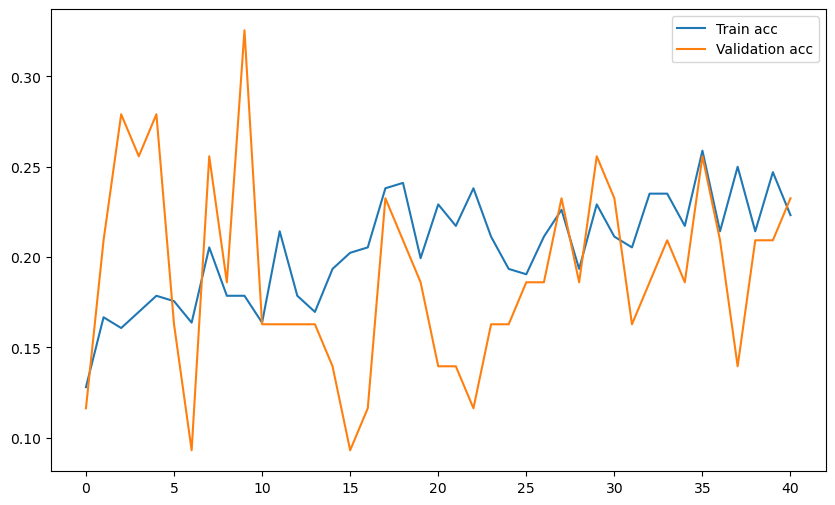

In [26]:
plt.figure(figsize=[10,6])
plt.plot(history_new.history["accuracy"], label = "Train acc")
plt.plot(history_new.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

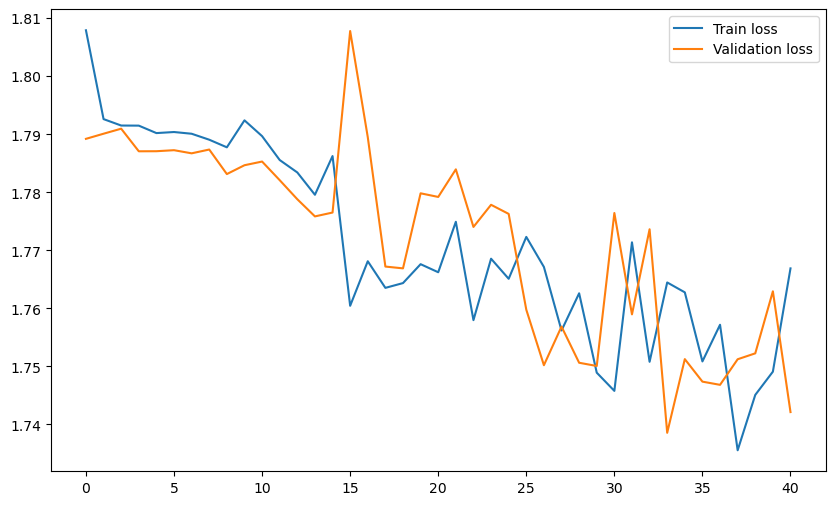

In [27]:
plt.figure(figsize=(10,6))
plt.plot(history_new.history['loss'], label = "Train loss")
plt.plot(history_new.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()